<a href="https://colab.research.google.com/github/andrew-mecchi/andrew-mecchi.github.io/blob/main/Market_Basket_Analysis_D212_Data_Minining_II_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Upload CSV file and create backup
df = pd.read_csv(r'/content/drive/MyDrive/data_files/teleco_market_basket_d212_t3.csv')

df_backup = df.copy(deep = True)

In [7]:
# View first 10 rows of dataframe
# dataframe appears to be full of NaN rows
df.head(10)

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Entire rows missing values
# Clean dataframe and remove empty rows
df = df[df['Item01'].notna()]

# Reset index after dropping empty rows
df.reset_index(drop = True, inplace = True)

# View dataframe after rows dropped
df.head(10)

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
1,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TopMate C5 Laptop Cooler pad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Anker 2-in-1 USB Card Reader,USB 2.0 Printer cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10ft iPHone Charger Cable 2 Pack,Apple Lightning to USB cable,HP952XL ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Nylon Braided Lightning to USB cable,VIVO Dual LCD Monitor Desk mount,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,USB 2.0 Printer cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# View dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [ ]:
# For question B2 on Task 3, print an example of a dataset transaction
print(df.iloc[1])

Item01    Apple Lightning to Digital AV Adapter
Item02         TP-Link AC1750 Smart WiFi Router
Item03                             Apple Pencil
Item04                                      NaN
Item05                                      NaN
Item06                                      NaN
Item07                                      NaN
Item08                                      NaN
Item09                                      NaN
Item10                                      NaN
Item11                                      NaN
Item12                                      NaN
Item13                                      NaN
Item14                                      NaN
Item15                                      NaN
Item16                                      NaN
Item17                                      NaN
Item18                                      NaN
Item19                                      NaN
Item20                                      NaN
Name: 1, dtype: object


In [ ]:
# Identify the number of transactions in the dataset
print("Number of individual transactions: " + str(df.shape[0]))
print("Number of max items per transaction: " + str(df.shape[1]))

Number of individual transactions: 7501
Number of max items per transaction: 20


In [ ]:
# Transform transactional data into list of lists
# (Kamara, 2022)
com_item_list = []

for row in range (len(df)):
  com_item_list.append([str(df.values[row, value])
  for value in range(len(df.columns))])


In [ ]:
# Instantiate encoder object
encoder = TransactionEncoder()

# Fit and transform encoder
encoded = encoder.fit(com_item_list).transform(com_item_list)

In [ ]:
# Recast encoded array as a dataframe
df_clean = pd.DataFrame(encoded, columns = encoder.columns_)

In [ ]:
# Confirm no empty columns in clean df
for col in df_clean.columns:
  print(col)

10ft iPHone Charger Cable
10ft iPHone Charger Cable 2 Pack
3 pack Nylon Braided Lightning Cable
3A USB Type C Cable 3 pack 6FT
5pack Nylon Braided USB C cables
ARRIS SURFboard SB8200 Cable Modem
Anker 2-in-1 USB Card Reader
Anker 4-port USB hub
Anker USB C to HDMI Adapter
Apple Lightning to Digital AV Adapter
Apple Lightning to USB cable
Apple Magic Mouse 2
Apple Pencil
Apple Pencil 2nd Gen
Apple Power Adapter Extension Cable
Apple USB-C Charger cable
AutoFocus 1080p Webcam
BENGOO G90000 headset
Blue Light Blocking Glasses
Blue Light Blocking Glasses 2pack
Brother Genuine High Yield Toner Cartridge
Cat 6 Ethernet Cable 50ft
Cat8 Ethernet Cable
CicTsing MM057 2.4G Wireless Mouse
Cleaning Gel Universal Dust Cleaner
Creative Pebble 2.0 Speakers
DisplayPort ot HDMI adapter
Dust-Off Compressed Gas
Dust-Off Compressed Gas 2 pack
FEEL2NICE 5 pack 10ft Lighning cable
FEIYOLD Blue light Blocking Glasses
Falcon Dust Off Compressed Gas
HOVAMP Mfi 6pack Lightning Cable
HOVAMP iPhone charger
HP 61 

In [ ]:
# Found a NaN column, drop empty column
df_clean = df_clean.drop(columns = ['nan'], axis = 1)

# Confirm drop of NaN column, should now have 119 columns
df_clean.shape

KeyError: "['nan'] not found in axis"

In [ ]:
df_clean.shape

(7501, 119)

In [ ]:
# Perform column search to confirm removal of NaN column
for col in df_clean.columns:
  print(col)

10ft iPHone Charger Cable
10ft iPHone Charger Cable 2 Pack
3 pack Nylon Braided Lightning Cable
3A USB Type C Cable 3 pack 6FT
5pack Nylon Braided USB C cables
ARRIS SURFboard SB8200 Cable Modem
Anker 2-in-1 USB Card Reader
Anker 4-port USB hub
Anker USB C to HDMI Adapter
Apple Lightning to Digital AV Adapter
Apple Lightning to USB cable
Apple Magic Mouse 2
Apple Pencil
Apple Pencil 2nd Gen
Apple Power Adapter Extension Cable
Apple USB-C Charger cable
AutoFocus 1080p Webcam
BENGOO G90000 headset
Blue Light Blocking Glasses
Blue Light Blocking Glasses 2pack
Brother Genuine High Yield Toner Cartridge
Cat 6 Ethernet Cable 50ft
Cat8 Ethernet Cable
CicTsing MM057 2.4G Wireless Mouse
Cleaning Gel Universal Dust Cleaner
Creative Pebble 2.0 Speakers
DisplayPort ot HDMI adapter
Dust-Off Compressed Gas
Dust-Off Compressed Gas 2 pack
FEEL2NICE 5 pack 10ft Lighning cable
FEIYOLD Blue light Blocking Glasses
Falcon Dust Off Compressed Gas
HOVAMP Mfi 6pack Lightning Cable
HOVAMP iPhone charger
HP 61 

In [ ]:
# Preview first 3 rows of cleaned dataframe
df_clean.head(3)

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Export encoded dataframe of itemized list of rx's to csv file
df_clean.to_csv(r'C:\\Users\\andrew\\Desktop\\WGU_MSDA\\D212_Data_Mining_II\\PA\\Task_3\\df_clean.csv')

In [ ]:
# Identify frequent item sets
fq_item_sets = apriori(df_clean, min_support = 0.02, use_colnames = True)

fq_item_sets

,support,itemsets
0,0.050527,(10ft iPHone Charger Cable 2 Pack)
1,0.042528,(3A USB Type C Cable 3 pack 6FT)
2,0.029463,(Anker 2-in-1 USB Card Reader)
3,0.068391,(Anker USB C to HDMI Adapter)
4,0.087188,(Apple Lightning to Digital AV Adapter)
...,...,...
98,0.023730,"(USB 2.0 Printer cable, Screen Mom Screen Clea..."
99,0.035462,"(VIVO Dual LCD Monitor Desk mount, Screen Mom ..."
100,0.020131,"(USB 2.0 Printer cable, Stylus Pen for iPad)"
101,0.025197,"(VIVO Dual LCD Monitor Desk mount, Stylus Pen ..."


In [ ]:
# Define association rules, metric will be lift
rules = association_rules(fq_item_sets, metric = 'lift', min_threshold = 1)

# Identify number of associations
print("Number of Associations: " + str(rules.shape[0]))

Number of Associations: 94


In [ ]:
# View association rules table
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
1,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182
2,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991
3,(Dust-Off Compressed Gas 2 pack),(Anker USB C to HDMI Adapter),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830
4,(Anker USB C to HDMI Adapter),(VIVO Dual LCD Monitor Desk mount),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117
...,...,...,...,...,...,...,...,...,...
89,(Screen Mom Screen Cleaner kit),(VIVO Dual LCD Monitor Desk mount),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
90,(USB 2.0 Printer cable),(Stylus Pen for iPad),0.170911,0.095054,0.020131,0.117785,1.239135,0.003885,1.025766
91,(Stylus Pen for iPad),(USB 2.0 Printer cable),0.095054,0.170911,0.020131,0.211781,1.239135,0.003885,1.051852
92,(VIVO Dual LCD Monitor Desk mount),(Stylus Pen for iPad),0.174110,0.095054,0.025197,0.144717,1.522468,0.008647,1.058066


In [ ]:
# PA - C3 -  provide values for the support, lift, and confidence of the association rules table
rules[['antecedents', 'consequents', 'support', 'lift', 'confidence']]

,antecedents,consequents,support,lift,confidence
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.023064,1.914955,0.456464
1,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.023064,1.914955,0.096756
2,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.024397,1.496530,0.356725
3,(Dust-Off Compressed Gas 2 pack),(Anker USB C to HDMI Adapter),0.024397,1.496530,0.102349
4,(Anker USB C to HDMI Adapter),(VIVO Dual LCD Monitor Desk mount),0.020931,1.757755,0.306043
...,...,...,...,...,...
89,(Screen Mom Screen Cleaner kit),(VIVO Dual LCD Monitor Desk mount),0.035462,1.571779,0.273663
90,(USB 2.0 Printer cable),(Stylus Pen for iPad),0.020131,1.239135,0.117785
91,(Stylus Pen for iPad),(USB 2.0 Printer cable),0.020131,1.239135,0.211781
92,(VIVO Dual LCD Monitor Desk mount),(Stylus Pen for iPad),0.025197,1.522468,0.144717


In [ ]:
# View summary statistics of rules to view min and max of different metrics
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.151278,0.151278,0.029151,0.219388,1.467501,0.008613,1.095327
std,0.057813,0.057813,0.009367,0.091316,0.267644,0.004427,0.080785
min,0.050527,0.050527,0.020131,0.084452,1.071482,0.001583,1.010756
25%,0.095321,0.095321,0.022830,0.142070,1.264756,0.005700,1.039471
50%,0.163845,0.163845,0.025197,0.206738,1.439085,0.008090,1.063792
75%,0.179709,0.179709,0.034229,0.278278,1.639027,0.011201,1.122142
max,0.238368,0.238368,0.059725,0.456464,2.291162,0.022088,1.401255


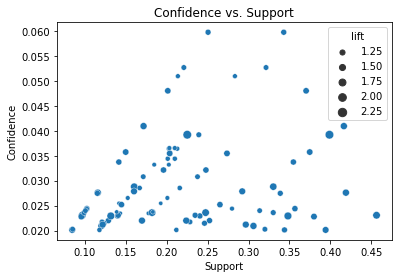

In [ ]:
# View scatter plot of filtered rules' antecedents and consequent supports using lift as a size metric
sns.scatterplot(x = 'confidence', y = 'support', size = 'lift', data = rules)
plt.title("Confidence vs. Support")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [ ]:
# Look for top rules adjusting metrics for support, lift, and confidence
top_3_rules = rules[(rules['support'] >= 0.025) & (rules['lift'] >= 1.75) & (rules['confidence'] >= 0.33)].sort_values(by = ['lift'], ascending = False)

top_3_rules[['antecedents', 'consequents', 'support', 'lift', 'confidence']]

,antecedents,consequents,support,lift,confidence
85,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.039195,2.291162,0.398915
6,(Apple Lightning to Digital AV Adapter),(Apple Pencil),0.028796,1.837830,0.330275
36,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.027596,1.757904,0.419028


In [ ]:
top_3_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
85,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
6,(Apple Lightning to Digital AV Adapter),(Apple Pencil),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
36,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962


In [ ]:
print("Antecedent Purchase Totals: ")
print("SanDisk 64GB Memory Card: " + str(df_clean['SanDisk Ultra 64GB card'].sum()))
print("Apple Lightning to Digital AV Adapter: " + str(df_clean['Apple Lightning to Digital AV Adapter'].sum()))
print("Blue Light Blocking Glasses: " + str(df_clean['FEIYOLD Blue light Blocking Glasses'].sum()))
print("\n" + "Consequent Purchase Totals: ")
print("Monitor Desk Mount Purchases: " + str(df_clean['VIVO Dual LCD Monitor Desk mount'].sum()))
print("Apple Pencil: " + str(df_clean['Apple Pencil'].sum()))
print("Compressed Gas 2-Packs Purchases: " + str(df_clean['Dust-Off Compressed Gas 2 pack'].sum()))


Antecedent Purchase Totals: 
SanDisk 64GB Memory Card: 737
Apple Lightning to Digital AV Adapter: 654
Blue Light Blocking Glasses: 494

Consequent Purchase Totals: 
Monitor Desk Mount Purchases: 1306
Apple Pencil: 1348
Compressed Gas 2-Packs Purchases: 1788


In [ ]:
############################################### The End